## CPSC 8430 Fall 24 HW 1_2b

#### 1. Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

#### 2. Define DNN

In [2]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### 3. Function for calculating gradient norm (p=2)

In [3]:
def calculate_gradient_norm(model):
    grad_all = 0.0
    for p in model.parameters():
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
            grad_all += grad
    grad_norm = grad_all ** 0.5  # p=2-norm
    return grad_norm

#### 4. Load MINST dataset

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('./data_MNIST', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

#### 5. Traning loop

In [5]:
epochs = 5
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
grad_norms = []

# Training the model
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        
        grad_norm = calculate_gradient_norm(model)  # Calculate gradient norm
        grad_norms.append(grad_norm)
        
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
        losses.append(running_loss / (i+1))
        
        if i % 100 == 0:  # Print every 100 iterations
            print(f'Epoch {epoch+1}, Iteration {i}, Loss: {running_loss/(i+1):.4f}, Grad Norm: {grad_norm:.4f}')

Epoch 1, Iteration 0, Loss: 2.3220, Grad Norm: 0.9515
Epoch 1, Iteration 100, Loss: 0.6371, Grad Norm: 2.1954
Epoch 1, Iteration 200, Loss: 0.4699, Grad Norm: 1.8516
Epoch 1, Iteration 300, Loss: 0.3957, Grad Norm: 0.8412
Epoch 1, Iteration 400, Loss: 0.3470, Grad Norm: 1.2274
Epoch 1, Iteration 500, Loss: 0.3145, Grad Norm: 0.6425
Epoch 1, Iteration 600, Loss: 0.2899, Grad Norm: 0.6350
Epoch 1, Iteration 700, Loss: 0.2699, Grad Norm: 1.6564
Epoch 1, Iteration 800, Loss: 0.2529, Grad Norm: 1.6205
Epoch 1, Iteration 900, Loss: 0.2394, Grad Norm: 1.5578
Epoch 2, Iteration 0, Loss: 0.1588, Grad Norm: 1.3726
Epoch 2, Iteration 100, Loss: 0.0947, Grad Norm: 0.9282
Epoch 2, Iteration 200, Loss: 0.0960, Grad Norm: 1.1947
Epoch 2, Iteration 300, Loss: 0.0963, Grad Norm: 0.8205
Epoch 2, Iteration 400, Loss: 0.0993, Grad Norm: 0.6259
Epoch 2, Iteration 500, Loss: 0.0987, Grad Norm: 0.7102
Epoch 2, Iteration 600, Loss: 0.0986, Grad Norm: 0.2547
Epoch 2, Iteration 700, Loss: 0.0973, Grad Norm: 1.1

#### 6. Plot gradient norms and losses

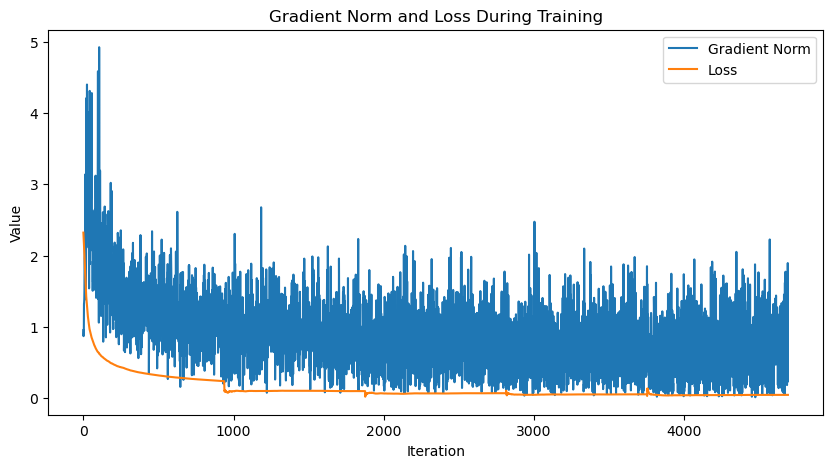

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(grad_norms, label='Gradient Norm')
plt.plot(losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Gradient Norm and Loss During Training')
plt.legend()
plt.show()